# Estructurando un Proyecto de DS (Parte III) & Proyecto Complementario I

Dataset a usar: [Diabetes, Hypertension and Stroke Prediction](https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=health_data.csv)

# Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')
import ipywidgets as widgets

import statsmodels.formula.api as sm
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import xgboost as xgb

# Abstract

Diabetes es una de las enfermedades crónicas más ocurrentes en la actualidad. Consiste en una enfermedad en el que los individuos pierden la habilidad de poder regular de forma efectiva los niveles de glucosa en la sangre, lo que puede reducir la calidad y la esperanza de vida. Después de que los diferentes alimentos se descompongan en azúcares durante la digestión, estos azúzcares son liberados dentro de la sangre. Esto le avisa al páncreas que libere insulina. La insulina habilita a las células dentro del cuerpo a usar los azúcares de la sangre para energía. La diabetes es generalmente caracterizado por el cuerpo no produciendo suficiente insulina o porque es incapaz de usar la insula que es producida de forma tan eficiente como se necesite.

El dataset proviene del Behavioral Risk Factor Surveillance System (BRFSS) que es una encuesta por teléfono que es recolectada anualmente. Cada año, la encuesta recolecta respuestas de más de 400 mil americanos con respecto a comportamientos de riesgo, condiciones de salud crónicas, entre otros. El dataset está conformado con respuestas desde 1984 hasta 2015. Si bien el dataset con tiene datos tanto para personas que sufren diabetes como para hipertensión y ACV, el enfoque que daremos en este caso será sobre las que sufren diabetes.

# Introducción

## Objetivo

La finalidad de este proyecto consiste en poder predecir si una persona tiene diabetes en base a diferentes condiciones físicas y psicológicas que caractericen a esta persona.

## Contexto Comercial

Con el incremento anual del porcentaje de personas que padecen diabetes, resulta de gran prioridad que la población pueda acceder a diferentes métodos (aparte de los ya ofrecidos por los mecanismos de salud pública y privada) para reconocer si se encuentra dentro del rango de personas que lo padecen.

Es por esto que a partir de las encuestas realizadas se busca descubrir patrones que permitan deducir si una persona sufre o no de diabetes. Estas encuestas van desde la edad y BMI de una persona, hasta aspectos como el bienestar físico y psicológico que sienten durante 30 días.

## Problema Comercial

En base al dataset a utilizar se busca resolver los siguientes problemas:

* ¿Es el dataset capaz de producir predicciones precisas con respecto a si un individuo tiene diabetes?

* ¿Qué factores tienden a ser más importantes a la hora de predecir el riesgo de diabetes?

## Contexto Analítico

El trabajo será realizado sobre un archivo .CSV que contiene datos sobre diferentes atributos físicos y psicológicos de diferentes personas, como también si sufren o han sufrido de las siguientes enfermedades: Diabetes, Hipertensión y ACV. El foco será realizado sobre diabetes.

Como tenemos información de quién sufre y quién no sufre diabetes, podemos decir que estamos ante un problema de aprendizaje supervisado.

# Extracción del Dataset

In [ ]:
# Importación del dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSJIHhvX0P1dCnfskv0EKQlYNt95BRPGta4-yu5kzlKPIly7Hg33_BiuJtzQ8mkNs4lLwqdjgTcmZIC/pub?gid=1513689152&single=true&output=csv"
df = pd.read_csv(url)

# Conversión de columna de sexo para mejor legibilidad
df['Sex'].replace([0, 1], ['Mujer','Hombre'], inplace=True)

# Conversión de columnas de categorías
columnas = ["HighChol", "CholCheck", "Smoker", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
            "HvyAlcoholConsump", "DiffWalk", "Stroke", "HighBP", "Diabetes"]
for i in columnas:
    df[i].replace([0, 1],["No", "Si"],inplace=True)

# Traducción de Columnas
traduccion = {
    "Age": "Edad",
    "Sex": "Sexo",
    "HighChol": "ColesterolAlto",
    "BMI": "IMC",
    "Smoker": "Fumador",
    "CholCheck": "ControlColesterol",
    "HeartDiseaseorAttack": "EnfermedadOAtaqueCorazon",
    "PhysActivity": "ActividadFisica",
    "Fruits": "Frutas",
    "Veggies": "Verduras",
    "HvyAlcoholConsump": "ExcesoConsumoAlcohol",
    "GenHlth": "SaludGeneral",
    "MentHlth": "SaludMental",
    "PhysHlth": "SaludFisica",
    "DiffWalk": "DificultadCaminar",
    "Stroke": "ACV",
    "HighBP": "PresionAlta"
}
df.rename(columns = traduccion, inplace=True)

# Visualización del dataset
df.head()

,Edad,Sexo,ColesterolAlto,ControlColesterol,IMC,Fumador,EnfermedadOAtaqueCorazon,ActividadFisica,Frutas,Verduras,ExcesoConsumoAlcohol,SaludGeneral,SaludMental,SaludFisica,DificultadCaminar,ACV,PresionAlta,Diabetes
0,4,Hombre,No,Si,26,No,No,Si,No,Si,No,3,5,30,No,No,Si,No
1,12,Hombre,Si,Si,26,Si,No,No,Si,No,No,3,0,0,No,Si,Si,No
2,13,Hombre,No,Si,26,No,No,Si,Si,Si,No,1,0,10,No,No,No,No
3,11,Hombre,Si,Si,28,Si,No,Si,Si,Si,No,3,0,3,No,No,Si,No
4,8,Mujer,No,Si,29,Si,No,Si,Si,Si,No,2,0,0,No,No,No,No


# Variables:

| Variable | Descripción |
| ---|---|
|Edad| Edad divida en 13 categorías|
|Sexo|Sexo (Hombre o Mujer)|
|ColesterolAlto|Posee colesterol alto|
|ControlColesterol|Se hizo un chequeo de colesterol en los últimos 5 años|
|IMC|Índice de masa corporal|
|Fumador|Ha fumado más de 100 cigarrillos en su vida|
|EnfermedadOAtaqueCorazon|Sufre/Sufrió de alguna enfermedad o ataque del corazón|
|ActividadFisica|Realizó actividad física en los últimos 30 días|
|Frutas|Consume frutas una o más veces por día|
|Verduras|Consume vegetales una o más veces por día|
|ExcesoConsumoAlcohol|Bebe más de 14 tragos en la semana (o 7 para mujeres)|
|SaludGeneral|En la escala del 1 al 5 (siendo 1 excelente y 5 muy pobre) que tan bien considera su salud|
|SaludMental|Días con salud mental pobre (escala 1-30 días)|
|SaludFisica|Sufrió alguna lesión en los últimos 30 días (escala 1-30 días)|
|DificultadCaminar|Posee dificultad caminando o subiendo escaleras|
|ACV|Ha sufrido un ACV|
|PresionAlta|Tiene presión de sangre alta|
|Diabetes|Sufre de diabetes|

# Limpieza de Datos

* Chequeo de nulos:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Edad                      70692 non-null  int64 
 1   Sexo                      70692 non-null  object
 2   ColesterolAlto            70692 non-null  object
 3   ControlColesterol         70692 non-null  object
 4   IMC                       70692 non-null  int64 
 5   Fumador                   70692 non-null  object
 6   EnfermedadOAtaqueCorazon  70692 non-null  object
 7   ActividadFisica           70692 non-null  object
 8   Frutas                    70692 non-null  object
 9   Verduras                  70692 non-null  object
 10  ExcesoConsumoAlcohol      70692 non-null  object
 11  SaludGeneral              70692 non-null  int64 
 12  SaludMental               70692 non-null  int64 
 13  SaludFisica               70692 non-null  int64 
 14  DificultadCaminar     

No existen nulos en este dataset

# Exploratory Data Analysis

## 1. ¿Existe correlación entre la edad y tener diabetes?

Las edades dentro del dataset está dividido en 13 categorías:

|Categoría|1|2|3|4|5|6|7|8|9|10|11|12|13|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|**Edades**|18-24|25-29|30-34|35-39|40-44|45-49|50-54|55-59|60-64|65-69|70-74|75-79|80+|

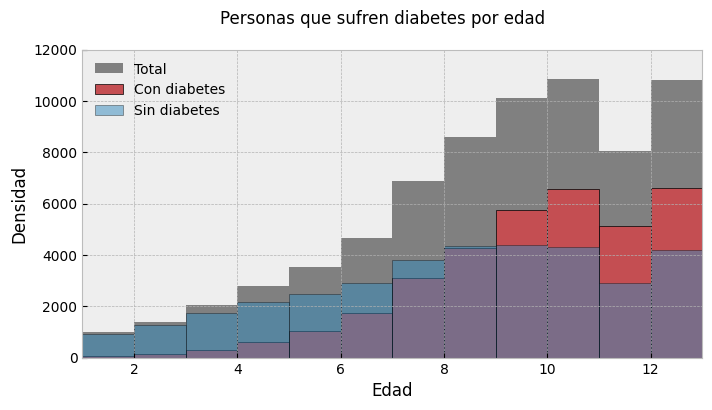

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
fig.suptitle("Personas que sufren diabetes por edad")

# Gráfico densidad diabetes según edad
ax.hist(df["Edad"], bins=range(14), color = "gray", label="Total")
ax.hist(df[df['Diabetes'] == "Si"]["Edad"], bins=range(14), color = "#C44E52", edgecolor = "black", label="Con diabetes")
ax.hist(df[df['Diabetes'] == "No"]["Edad"], bins=range(14), color = "#348ABD", edgecolor = "black", label="Sin diabetes", alpha=0.5)
ax.set(xlabel="Edad", ylabel="Densidad",xlim=[1,13], ylim=[0, 12000])
ax.legend(loc='best', frameon=False)

Como se puede observar, el dataset contiene mayor cantidad de personas con diabetes entre la categoría 9, 10 y 11. Esto puede darse por alguna correlación entre esas edades y la enfermedad, o simplemente porque las personas de esas categorías han sido las mas encuestadas (como puede verse en el total).

## 2. ¿Existe correlación con el sexo de la persona?


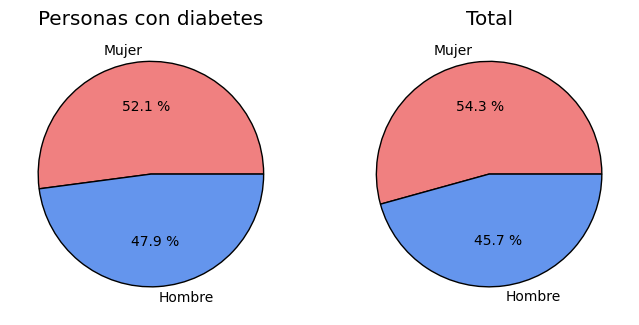

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

# Gráfico cantidad de personas con diabetes por sexo
ax[0].pie(df[df['Diabetes'] == "Si"]["Sexo"].value_counts(),
          labels=["Mujer", "Hombre"],
          autopct="%0.1f %%",
          colors = ["lightcoral", "cornflowerblue"],
          wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True})
ax[0].set_title("Personas con diabetes")

# Gráfico cantidad de personas en total por sexo
ax[1].pie(df["Sexo"].value_counts(),
          labels=["Mujer", "Hombre"],
          autopct="%0.1f %%",
          colors = ["lightcoral", "cornflowerblue"],
          wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True})
ax[1].set_title("Total");

De ambos gráficos no se observa ninguna relacion que indique que el sexo de la persona tenga significancia en la contracción de diabetes

## 3. ¿Existe correlación con el BMI?


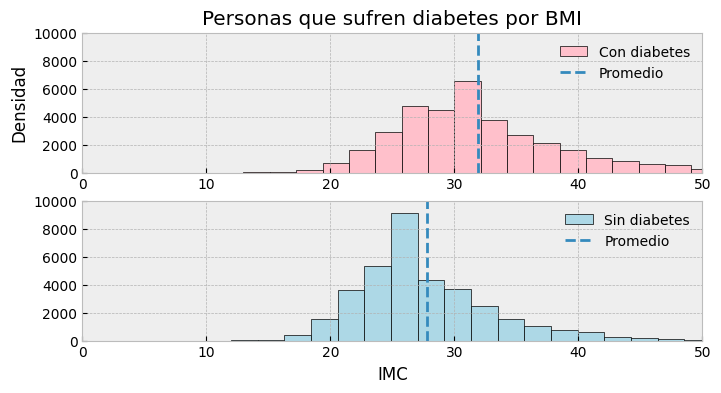

In [ ]:
fig, ax = plt.subplots(2, figsize=(8,4))

# Gráfico cantidad de personas con diabetes según IMC
ax[0].hist(df[df['Diabetes'] == "Si"]["IMC"], bins=40, color = "pink", edgecolor = "black", label="Con diabetes")
ax[0].vlines(df[df['Diabetes'] == "Si"]["IMC"].mean(), 0, 10000, label="Promedio", linestyle="--")
ax[0].set_xlim([0, 50])
ax[0].set_ylim([0, 10000])
ax[0].set_ylabel("Densidad")
ax[0].set_title("Personas que sufren diabetes por BMI");
ax[0].legend(loc='best', frameon=False)

# Gráfico cantidad de personas sin diabetes según IMC
ax[1].hist(df[df['Diabetes'] == "No"]["IMC"], bins=40, color = "lightblue", edgecolor = "black", label="Sin diabetes")
ax[1].set_xlabel("IMC")
ax[1].vlines(df[df['Diabetes'] == "No"]["IMC"].mean(), 0, 10000, label="Promedio", linestyle="--")
ax[1].set_xlim([0, 50])
ax[1].set_ylim([0, 10000])
ax[1].legend(loc='best', frameon=False);

Se puede deducir en este caso que las personas que sufren diabetes tienden a tener un BMI más alto que aquellos que no tienen diabetes.

## 4. ¿Existe correlación con la salud de la persona?

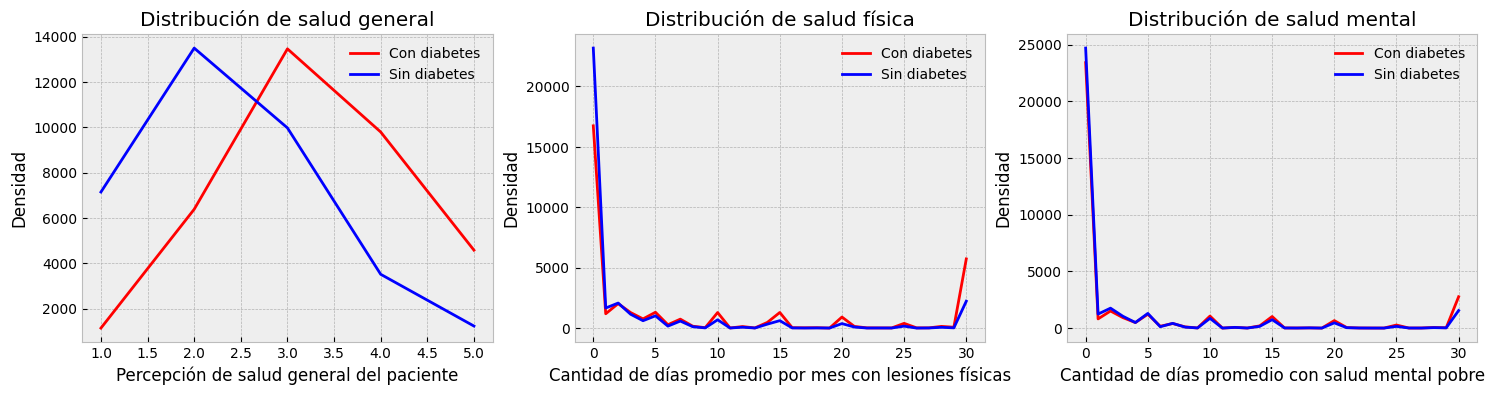

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4))

# Gráfico distribución salud general
ax[0].plot(df[df["Diabetes"] == "Si"]["SaludGeneral"].value_counts().sort_index(), color="red", label="Con diabetes")
ax[0].plot(df[df["Diabetes"] == "No"]["SaludGeneral"].value_counts().sort_index(), color="blue", label="Sin diabetes")
ax[0].legend(loc='best', frameon=False)
ax[0].set(xlabel="Percepción de salud general del paciente", title="Distribución de salud general", ylabel="Densidad")

# Gráfico distribución de salud física
ax[1].plot(df[df["Diabetes"] == "Si"]["SaludFisica"].value_counts().sort_index(), color="red", label="Con diabetes")
ax[1].plot(df[df["Diabetes"] == "No"]["SaludFisica"].value_counts().sort_index(), color="blue", label="Sin diabetes")
ax[1].legend(loc='best', frameon=False)
ax[1].set(xlabel="Cantidad de días promedio por mes con lesiones físicas", title="Distribución de salud física", ylabel="Densidad")

# Gráfico distribución de salud mental
ax[2].plot(df[df["Diabetes"] == "Si"]["SaludMental"].value_counts().sort_index(), color="red", label="Con diabetes")
ax[2].plot(df[df["Diabetes"] == "No"]["SaludMental"].value_counts().sort_index(), color="blue", label="Sin diabetes")
ax[2].legend(loc='best', frameon=False)
ax[2].set(xlabel="Cantidad de días promedio con salud mental pobre", title="Distribución de salud mental", ylabel="Densidad");

Un aspecto interesante y contrario al sentido común que se pudo observar es que las personas con diabetes consideran tener una vida mucho más saludable que aquellos sin diabetes.

Se puede suponer que esto ocurre ya que una persona que sabe que tiene diabetes tiende a tomar hábitos mucho más saludables, lo que le da una sensación de bienestar mejor que aquellos que no tienen diabetes.

Por otro lado, y teniendo en cuenta la salud mental y física de los encuestados, se puede observar pequeñas tendencias donde las personas con diabetes sufren de un estado de salud peor que aquellas personas sin diabetes.

## 5. ¿Hay correlación entre el BMI, el sexo y las personas que poseen diabetes?

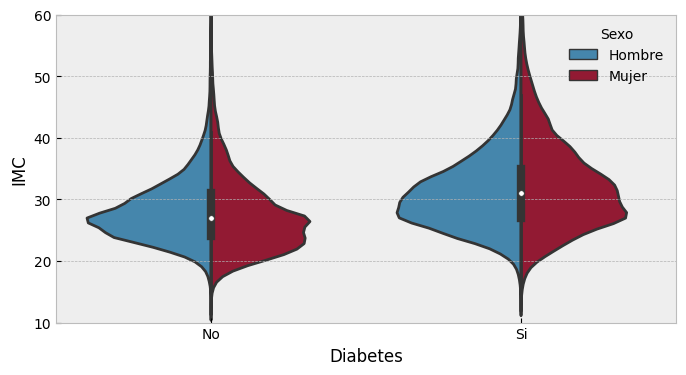

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

# Gráfico distribución de personas con y sin diabetes por sexo
sns.violinplot(data=df, x='Diabetes', y='IMC', hue="Sexo", split=True, ax=ax)
ax.set(ylim=[10,60]);
ax.legend(title="Sexo", frameon=False);

Se observa que, mientras la distribución de los hombres se encuentra más centralizado, las mujeres sin diabetes tienden a tener un BMI más bajo que los hombres sin diabetes, y aquellas con diabetes tienden a tener un BMI más alto que los hombres con diabetes.

Este dato en sí carece de importancia en términos generales pero resulta interesante mencionarlo como un detalle pequeño.

## 6. Correlación con otras categorías

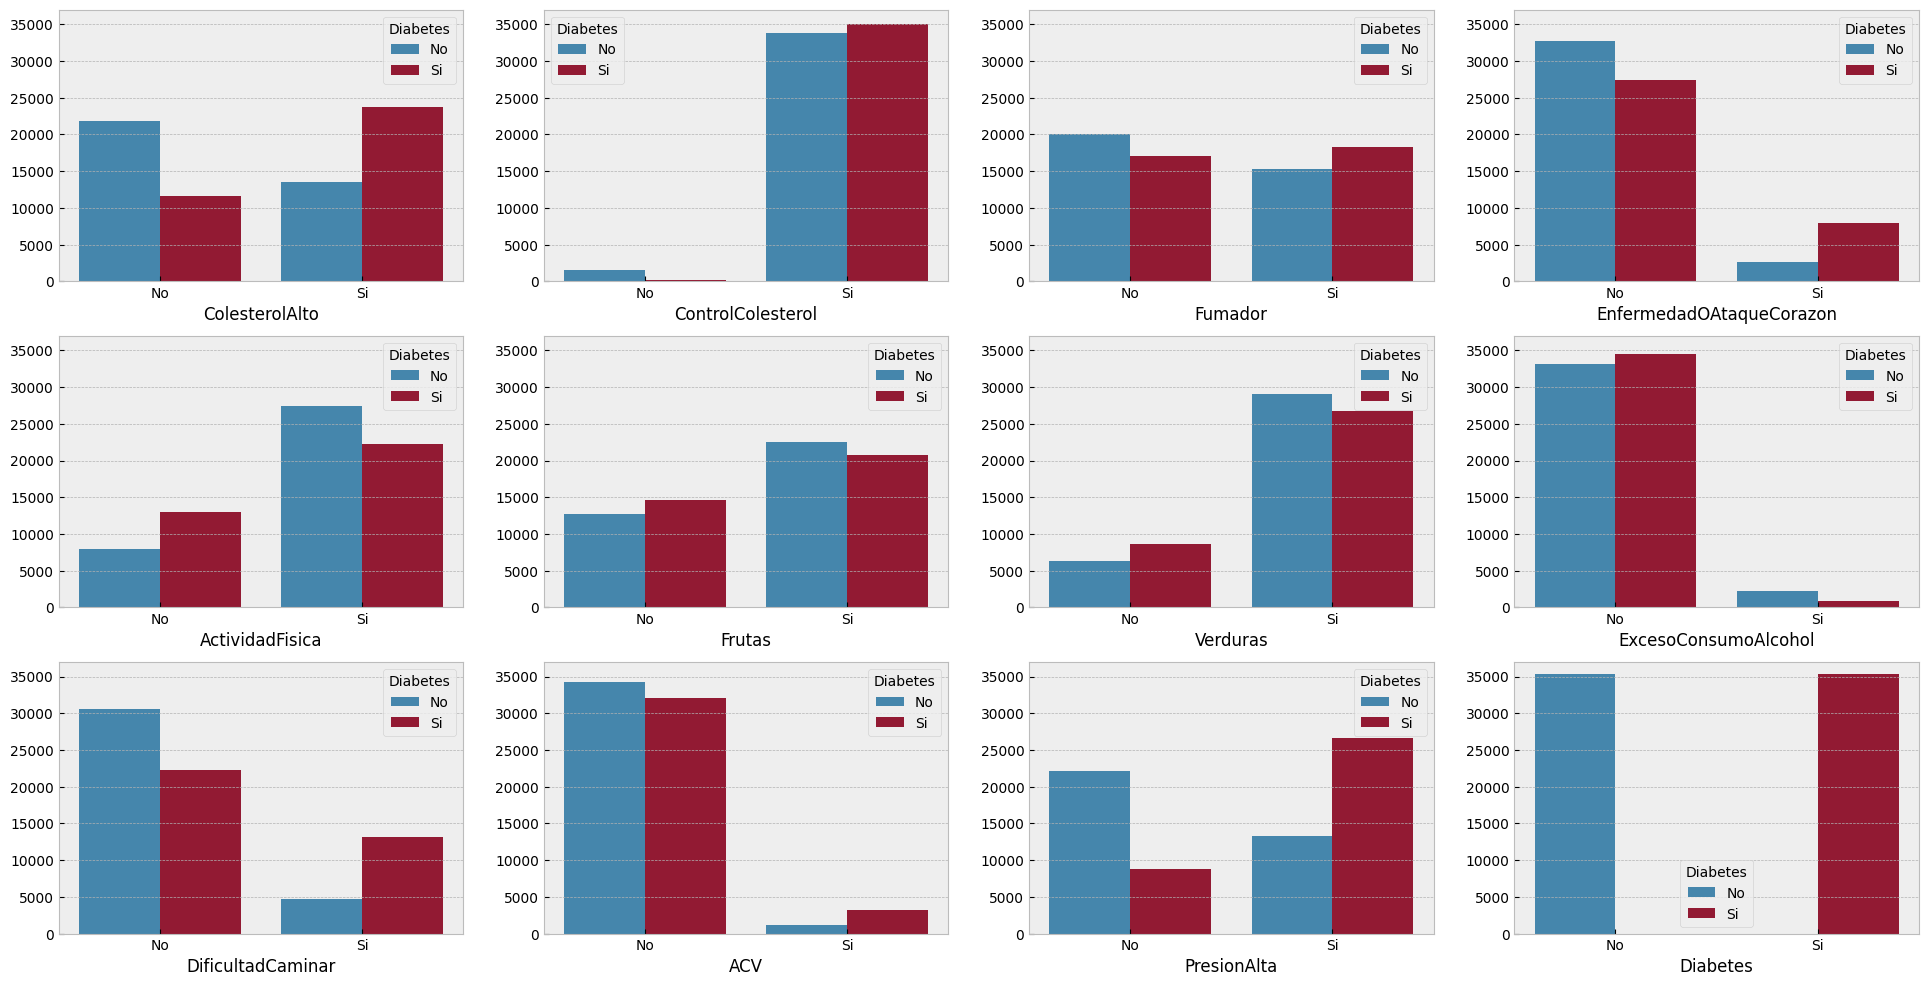

In [ ]:
categorias = ["ColesterolAlto", "ControlColesterol", "Fumador", "EnfermedadOAtaqueCorazon", "ActividadFisica", "Frutas", "Verduras", "ExcesoConsumoAlcohol", "DificultadCaminar", "ACV", "PresionAlta", "Diabetes"]

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(24,12))

# Generación de gráficos para las distintas columnas de la lista categorias
for i, ax in enumerate(fig.axes):
  if i < len(categorias):
    sns.countplot(data=df, x=categorias[i], hue="Diabetes", ax=ax, order=["No", "Si"])
    ax.set(ylabel="", ylim=(0,37000), xlabel=categorias[i])
  else:
    ax.remove()

## 7. Distribución de datos

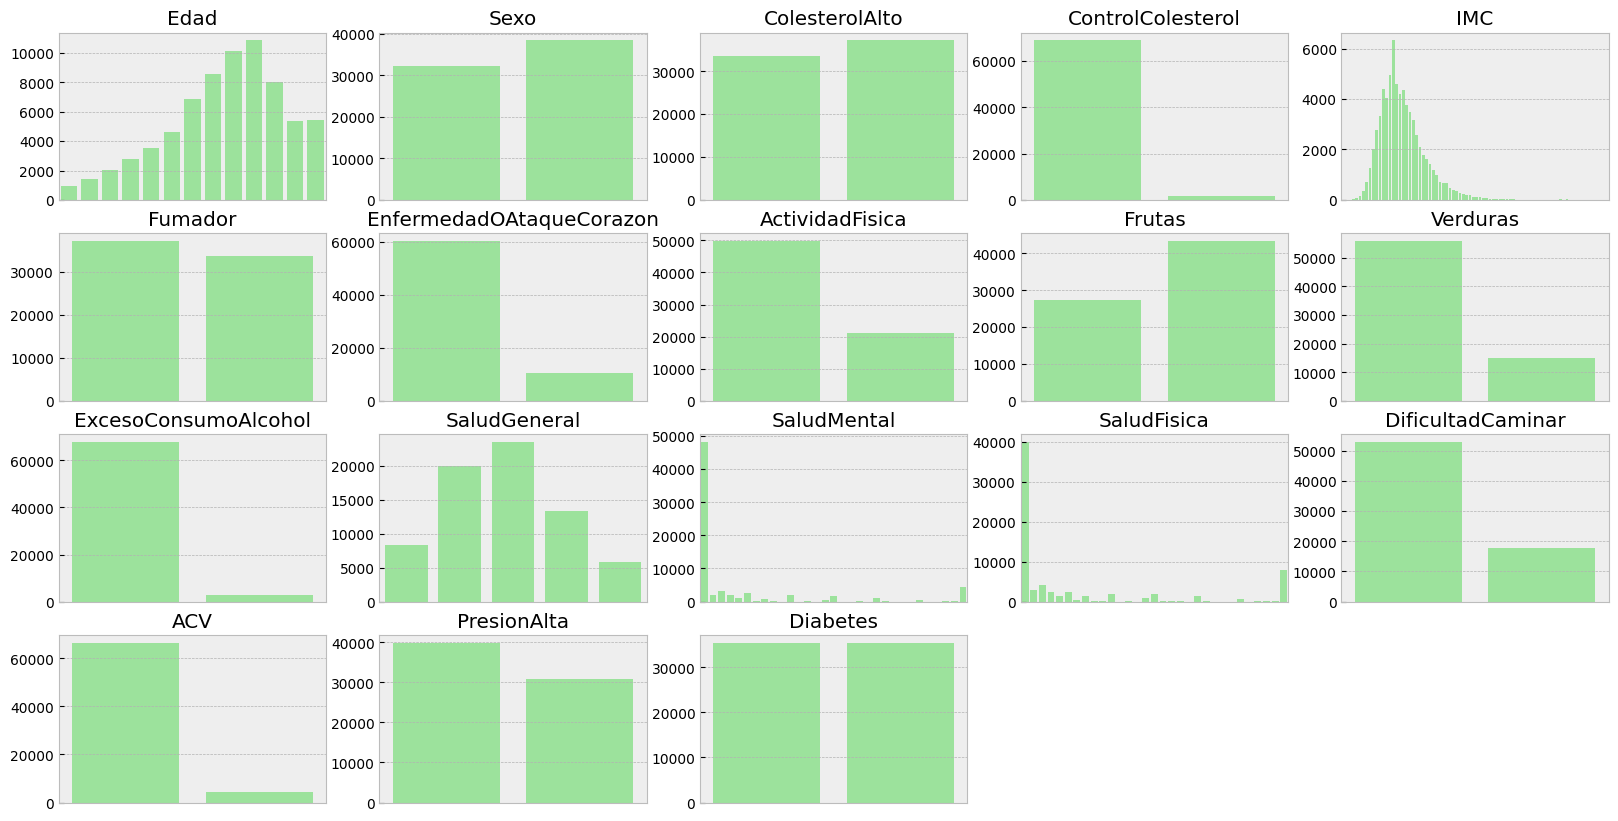

In [ ]:
columnas = df.columns
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20, 10))

# Generación de gráficos para las distintas columnas de la lista categorias
for i, ax in enumerate(fig.axes):
    if i < len(columnas):
        sns.countplot(data=df, x=columnas[i], ax=ax, color="lightgreen")
        ax.set(ylabel="", title=columnas[i], xlabel="")
        ax.set_xticks([])
    else:
        ax.remove()

## 8. Coeficientes de correlación

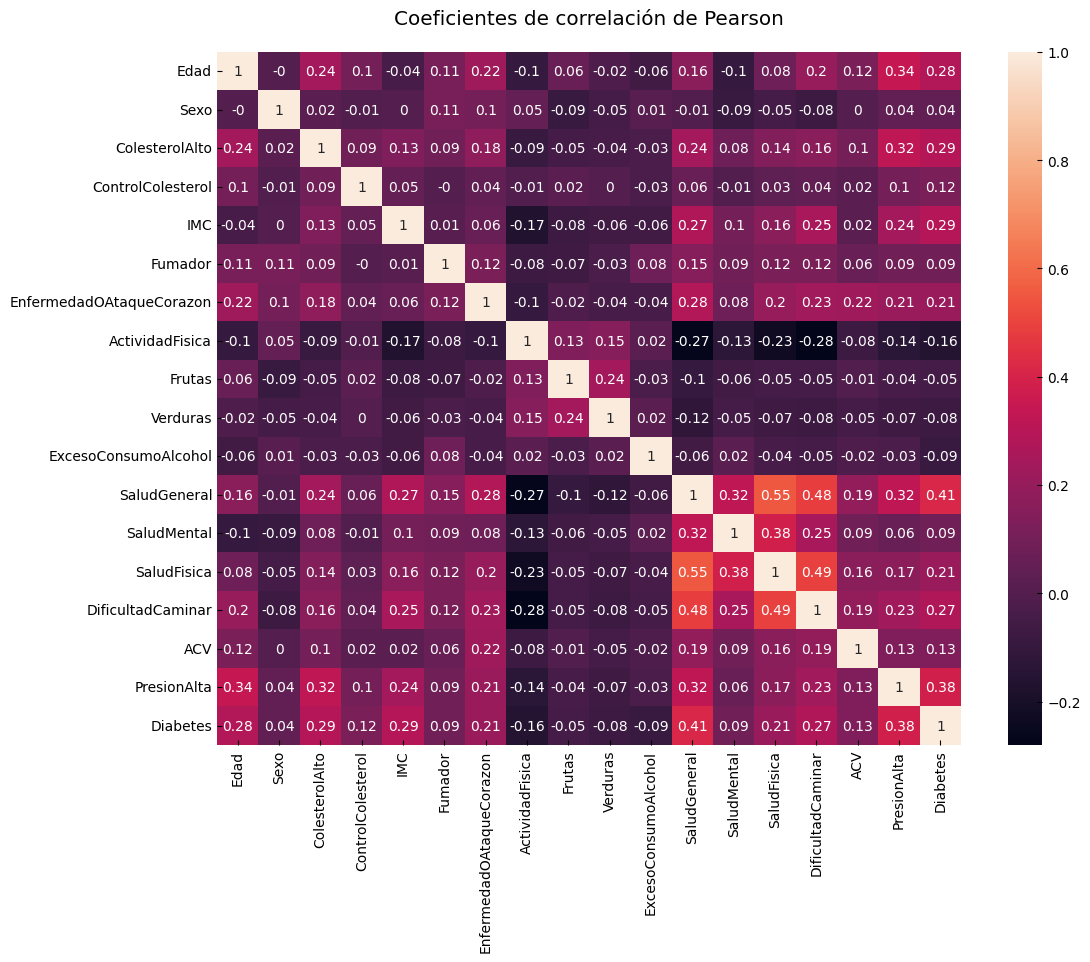

In [ ]:
# Conversión de datos
df.replace({"Mujer": 0,
            "Hombre": 1,
            "No": 0,
            "Si": 1}, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 9))

# Generamos la matriz de correlaciones de Pearson
correlaciones = df.corr(method="pearson", numeric_only=False)
correlaciones_redondeado = correlaciones.round(2)

# Generamos el mapa de correlaciones
sns.heatmap(correlaciones_redondeado, annot=True, ax=ax)

# Ocultamos la grilla y seteamos el título
ax.grid(False)
ax.set_title("Coeficientes de correlación de Pearson", pad=20);

Se puede observar que columnas como Sexo, Fumador, Frutas, Verduras, ExcesoConsumoAlcohol y SaludMental presentan poca correlación con respecto a la columna Diabetes.

Por otro lado, se presenta una correlación media alta entre las columnas SaludFísica, DificultadCaminar y SaludGeneral. Como la columna SaludGeneral es la que tiene mayor correlación con la columna Diabetes, puede considerarse a futuro mantener únicamente esta columna con respecto a las tres mencionadas.

## 9. ¿Qué variables tienden a predecir si una persona tiene o no diabetes?

Para este análisis aplicamos el método de mínimos cuadrados ordinarios

In [ ]:
# Generación de fórmula
columnas = list(df.columns)
columnas.remove("Diabetes")
formula = f"Diabetes~{' + '.join(columnas)}"

# Generación del modelo a partir de la fórmula y datos
modelo_lineal   = sm.ols(formula = formula, data = df).fit()
print(modelo_lineal.summary())

                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     1844.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:15:37   Log-Likelihood:                -38334.
No. Observations:               70692   AIC:                         7.670e+04
Df Residuals:                   70674   BIC:                         7.687e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Como se puede observar, al utilizar todas las columnas del dataset, obtenemos un R al cuadrado de 0.307, indicando que el modelo explica un 30,7% de los cambios respecto a la columna Diabetes.

Por otro lado, se observa que casi todas las columnas tienen un impacto sobre el modelo, excepto con la variable dependiente Fumador, donde se indica que hay un 64,9% de probabildiad de que la variable no tenga efecto sobre la variable dependiente.

## Insights

Con respecto a los datos ofrecidos, se pueden sacar las siguientes conclusiones en base a lo observado:

* Las personas mayores a 60 años tienden a tener un mayor riesgo de sufrir diabetes.
* El sexo de la persona posee algo de influencia entre si sufre o no diabetes.
* Personas con un mayor BMI tienen más riesgo de sufrir diabetes.
* Las personas que sienten tener un mejor estado de salud son más propensas a tener diabetes.
* Aproximadamente 2/3 de las personas encuestadas con diabetes tienen colesterol alto.
* Si bien la mayor cantidad de fumadores sufren diabetes, existe una cantidad pareja entre aquellas personas diabéticas que fuman y no fuman.
* Entre las personas que tienen problemas en el corazón, la mayoría son diabéticas.
* Gran parte de las personas diabéticas realizó actividad física en los últimos 30 días.
* No parece haber gran correlación entre las personas diabéticas y el consumo de frutas y verduras.
* Entre las personas con dificultades para caminar, que han sufrido un ACV, o que tengan presión de sangre alta, la mayor parte sufren diabetes.
* Hay mucha correlación entre tener dificultades para caminar, la salud física de la persona, y la salud general.

# Preparación del dataset

In [ ]:
# Estandarización de datos
cols_numericas = ["Edad", "IMC", "SaludGeneral", "SaludFisica", "SaludMental"]
df[cols_numericas] = StandardScaler().fit_transform(df[cols_numericas])

# Reducción de dimensionalidad

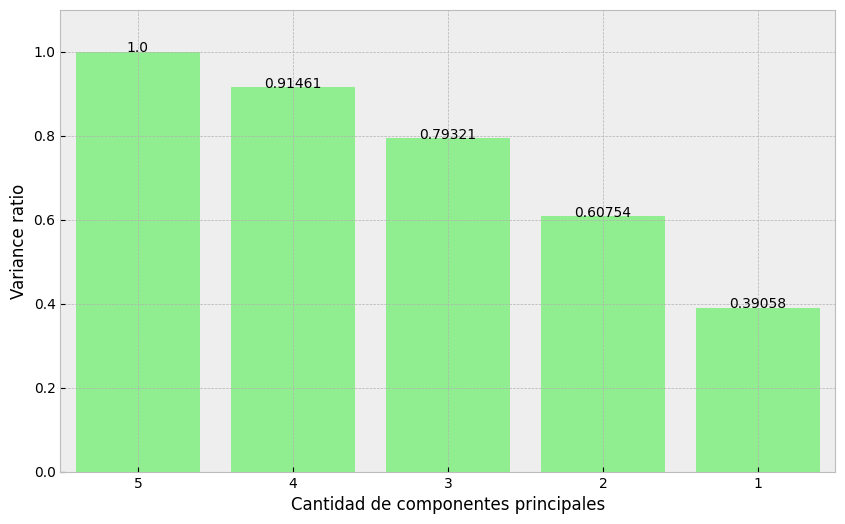

In [ ]:
# Números de componentes
n = len(cols_numericas)

# Entrenamiento modelo PCA con escalado de los datos
pca = PCA(n_components=n)
pca.fit(df[cols_numericas])

# Obtención de las sumas cumulativas de los componentes principales
variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(range(1, n+1), variance_ratio, color="lightgreen")
ax.set(ylim=[0, 1.1], xlim=[n+0.5, 0.5], ylabel="Variance ratio", xlabel="Cantidad de componentes principales")
for x in range(n):
  ax.text(x+1, variance_ratio[x], round(variance_ratio[x], 5), ha="center")

Se observa que no se puede reducir la cantidad de componentes principales sin bajar al 99% la calidad de la información.

Se observa que no se puede reducir la cantidad de componentes principales sin bajar al 99% la calidad de la información.

# Definición de test/train

In [ ]:
# Separación train/test
df_x = df.drop(columns=["Diabetes"])
df_y = df["Diabetes"]
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state=0)

# Algoritmos de clasificación

Se aplicarán los siguientes algoritmos:
* Regresión logística
* Árbol de decisión
* XGBoost

In [ ]:
# Modelos a usar
modelos = {"Regresión Logística": LogisticRegression(max_iter=10000, random_state=0, n_jobs=-1),
           "Árbol de Decisión": DecisionTreeClassifier(random_state=0, max_depth=10),
           "XGBoost": xgb.XGBClassifier(random_state=0)}

Emplearemos una función común que se aplicará para cada modelo:

In [ ]:
# Función que devuelve una figura con la predicción en base a un algoritmo y un conjunto de datos
def obtener_prediccion(nombre_modelo, modelo, X_train, X_test, y_train, y_test):

  # Ajuste del modelo
  modelo.fit(X_train, y_train)

  # Predicción
  predicciones = modelo.predict(X_test)

  # Gráfico de matriz de confusión
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
  fig.suptitle(nombre_modelo, fontweight="bold")
  ConfusionMatrixDisplay(confusion_matrix(y_test, predicciones)).plot(ax=ax[0])

  # Medida de precisión
  kfold = StratifiedKFold(n_splits=5)
  cross_v = cross_validate(estimator=modelo, X=X_train, y=y_train, scoring="accuracy", cv=kfold, return_train_score=True)
  medidas = {"Test score": cross_v["test_score"].mean(),
             "Train score": cross_v["train_score"].mean()}

  # Impresión de medidas
  ax[1].bar(medidas.keys(),
            medidas.values(),
            color=["lightgreen", "pink"])
  ax[1].set(ylim=[0, 1.1])
  for i, medida in enumerate(medidas):
    ax[1].text(i, medidas[medida], round(medidas[medida], 5), ha="center")

  return fig

Aplicación y visualización de cada modelo:

In [ ]:
# Se hace uso de los widgets provistos por la librería ipywidgets

children = []

for modelo in modelos:
  out = widgets.Output()
  with out:
    plt.show(obtener_prediccion(modelo, modelos[modelo], X_train, X_test, y_train, y_test))
  children.append(out)

tab = widgets.Tab(children=children)

for i, modelo in enumerate(modelos):
  tab.set_title(i, modelo)

display(tab)

# Conclusión

Por medio de los datos y algoritmos utilizados se ha logrado una precisión de aproximadamente el 75% a la hora de predecir si una persona tiene diabetes o no.
Si bien el nivel de precisión no es excelente, este modelo puede resultar útil para cuando se necesite un método complementario para analizar si una persona tiene diabetes, en el caso de que no se disponga del personal o herramientas de salud necesarias para un análisis formal.

Queda claro por medio de este análisis que el proyecto aún necesita pasar por refinamientos para brindar una mejor resolución al problema, por lo que dar una conclusión final en estos momentos sería innecesario.

En futuras iteraciones de este proyecto, se buscará aplicar otras técnicas que permitan mejorar el nivel de precisión, entre ellas:
* Analizar outliers
* Aplicación de feature selection y feature importance
* Implementar GridSearchCV para mejorar los parámetros de los modelos de ML
* Analizar simetría de distribución de datos.